In [63]:
import pandas as pd
import seaborn as sns

In [6]:
train = pd.read_csv('train.csv', engine='pyarrow', dtype_backend='pyarrow')

In [7]:
train.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


In [8]:
train.dtypes

id                             int64[pyarrow]
person_age                     int64[pyarrow]
person_income                  int64[pyarrow]
person_home_ownership         string[pyarrow]
person_emp_length             double[pyarrow]
loan_intent                   string[pyarrow]
loan_grade                    string[pyarrow]
loan_amnt                      int64[pyarrow]
loan_int_rate                 double[pyarrow]
loan_percent_income           double[pyarrow]
cb_person_default_on_file     string[pyarrow]
cb_person_cred_hist_length     int64[pyarrow]
loan_status                    int64[pyarrow]
dtype: object

In [ ]:
# home ownership has rent, mortgage, own and other
#                other is mostly young people
def transform(df):
    df = df.assign(**df.select_dtypes('string').astype('category'))
    df['person_age'] = df['person_age'].replace(123,23)

# investigate categories

In [45]:
stringDf = train.select_dtypes('category')
stringDf#.describe().T

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
0,RENT,EDUCATION,B,N
1,OWN,MEDICAL,C,N
2,OWN,PERSONAL,A,N
3,RENT,VENTURE,B,N
4,RENT,MEDICAL,A,N
...,...,...,...,...
58640,MORTGAGE,EDUCATION,D,Y
58641,RENT,MEDICAL,C,N
58642,RENT,EDUCATION,D,N
58643,RENT,EDUCATION,A,N


In [46]:
for col in stringDf.columns:
    print(stringDf[col].value_counts())

person_home_ownership
RENT        30594
MORTGAGE    24824
OWN          3138
OTHER          89
Name: count, dtype: int64
loan_intent
EDUCATION            12271
MEDICAL              10934
PERSONAL             10016
VENTURE              10011
DEBTCONSOLIDATION     9133
HOMEIMPROVEMENT       6280
Name: count, dtype: int64
loan_grade
A    20984
B    20400
C    11036
D     5034
E     1009
F      149
G       33
Name: count, dtype: int64
cb_person_default_on_file
N    49943
Y     8702
Name: count, dtype: int64


In [55]:
pd.crosstab(index=stringDf['person_home_ownership'],columns=stringDf['loan_intent'],normalize=False).style.background_gradient(cmap='RdBu')

loan_intent,DEBTCONSOLIDATION,EDUCATION,HOMEIMPROVEMENT,MEDICAL,PERSONAL,VENTURE
person_home_ownership,,,,,,
MORTGAGE,4045,5002,3245,3825,4467,4240
OTHER,10,17,10,7,23,22
OWN,43,695,370,468,560,1002
RENT,5035,6557,2655,6634,4966,4747


In [59]:
# loand intent seems to be quite uniformly distributed over load_grade
# lot more grade a/b than f/g (almost linear relation)
pd.crosstab(index=stringDf['loan_grade'],columns=stringDf['loan_intent'],).style.background_gradient(cmap='RdBu')

loan_intent,DEBTCONSOLIDATION,EDUCATION,HOMEIMPROVEMENT,MEDICAL,PERSONAL,VENTURE
loan_grade,,,,,,
A,3384,4410,2143,3694,3695,3658
B,3089,4212,2060,3983,3485,3571
C,1678,2526,1190,2148,1727,1767
D,840,876,692,896,934,796
E,119,214,172,174,144,186
F,21,28,22,29,24,25
G,2,5,1,10,7,8


In [60]:
pd.crosstab(index=stringDf['cb_person_default_on_file'],columns=stringDf['loan_intent'],).style.background_gradient(cmap='RdBu')

loan_intent,DEBTCONSOLIDATION,EDUCATION,HOMEIMPROVEMENT,MEDICAL,PERSONAL,VENTURE
cb_person_default_on_file,,,,,,
N,7840,10402,5206,9341,8537,8617
Y,1293,1869,1074,1593,1479,1394


In [61]:
# the worse the load grade the more close people default in family
pd.crosstab(index=stringDf['cb_person_default_on_file'],columns=stringDf['loan_grade'],).style.background_gradient(cmap='RdBu')

loan_grade,A,B,C,D,E,F,G
cb_person_default_on_file,,,,,,,
N,20980,20394,5523,2461,502,68,15
Y,4,6,5513,2573,507,81,18


In [40]:
otherHomeOwn = train.loc[train.person_home_ownership =='OTHER']#.select_dtypes('int')
otherHomeOwn

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
749,749,24,70000,OTHER,0.0,DEBTCONSOLIDATION,A,9500,8.07,0.14,N,4,0
795,795,25,82656,OTHER,10.0,DEBTCONSOLIDATION,C,6000,12.09,0.07,Y,4,0
1794,1794,24,87000,OTHER,1.0,HOMEIMPROVEMENT,B,7200,11.26,0.08,N,4,0
2393,2393,24,60000,OTHER,0.0,HOMEIMPROVEMENT,C,15000,12.22,0.25,Y,2,0
2897,2897,22,32000,OTHER,3.0,PERSONAL,C,7500,14.27,0.23,Y,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
56701,56701,22,68000,OTHER,6.0,EDUCATION,A,6000,8.59,0.09,N,3,0
57072,57072,23,44000,OTHER,5.0,VENTURE,B,7500,10.08,0.17,N,3,0
58284,58284,24,60000,OTHER,1.0,MEDICAL,A,14000,8.90,0.22,N,4,0
58316,58316,22,62500,OTHER,6.0,PERSONAL,C,5000,13.22,0.08,Y,3,0


In [16]:
train.select_dtypes('string').eq('').any()

person_home_ownership        False
loan_intent                  False
loan_grade                   False
cb_person_default_on_file    False
dtype: bool

In [21]:
train = train.assign(**train.select_dtypes('string').astype('category'))

# numeric stuff, focus on relation to loan_status

In [64]:
train.loan_status.value_counts(), train.columns

(loan_status
 0    50295
 1     8350
 Name: count, dtype: int64[pyarrow],
 Index(['id', 'person_age', 'person_income', 'person_home_ownership',
        'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
        'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file',
        'cb_person_cred_hist_length', 'loan_status'],
       dtype='object'))

<Axes: xlabel='loan_status', ylabel='person_income'>

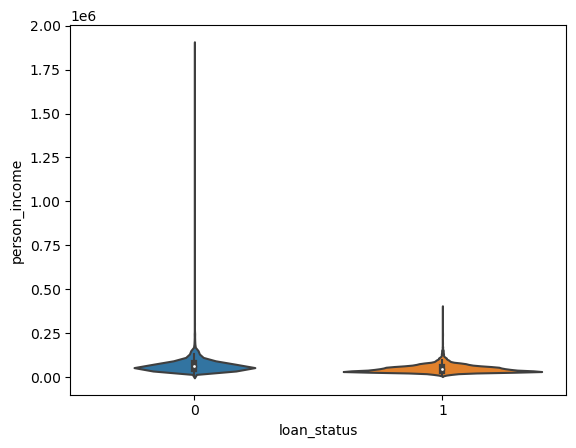

In [81]:
sns.violinplot(train, x='loan_status',y='person_income')

In [83]:
# person age larger than 120, seems fishy, also older than 80 seems fishy, who would default there
# one outlier with 123 -> probably typo
# some loans for older people, they might default on it bc of death (in test we have even for 94 years old)
train.loc[train.person_income >1e6]

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
2093,2093,32,1200000,RENT,2.0,PERSONAL,A,10000,7.51,0.01,N,9,0
12404,12404,25,1839784,RENT,0.0,VENTURE,A,8000,8.00,0.04,N,3,0
17387,17387,22,1900000,MORTGAGE,6.0,EDUCATION,D,1500,15.62,0.00,Y,3,0
19060,19060,32,1200000,MORTGAGE,16.0,DEBTCONSOLIDATION,A,16000,6.92,0.13,N,5,0
37591,37591,29,1824000,MORTGAGE,8.0,DEBTCONSOLIDATION,C,6000,13.99,0.03,N,6,0


In [69]:
test = pd.read_csv('test.csv')
test.loc[test.person_age > 70]

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
32201,90846,84,60000,MORTGAGE,0.0,DEBTCONSOLIDATION,A,2000,5.79,0.03,N,25
33824,92469,94,56628,RENT,2.0,MEDICAL,E,16000,16.82,0.29,Y,27


In [79]:
train['person_age'] = train['person_age'].replace(123,23)